<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/MLCI/TP/MLCI_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

data = np.array([
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])
labels = np.array([0, 1, 0, 0])


weights = np.append(np.random.uniform(-1, 1, 2), 0)


learning_rate = 0.1
epochs = 300000

print(weights)


[-1.59495186e-05 -1.34971662e-01  0.00000000e+00]


In [2]:
def weighted_sum(inputs):
  inputs_with_bias = np.append(inputs, 1)
  return np.dot(inputs_with_bias, weights)    # sum input*weight

weighted_sum([1,0])


np.float64(-1.5949518633151527e-05)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:


def calculate_error(prediction, target):
    return prediction - target

def MSE(predictions, targets):
    errors = calculate_error(predictions, targets)
    squared_errors = errors ** 2
    mse = np.mean(squared_errors)  # average
    return mse





In [5]:

def calculate_gradient(error, prediction):
    gradient = error * prediction * (1 - prediction)
    return gradient


In [6]:

def adjust_weights(inputs, gradient):
    global weights
    inputs_with_bias = np.append(inputs, 1)
    #print(learning_rate,gradient,inputs_with_bias)
    weights += learning_rate * gradient * inputs_with_bias
    #print(weights)


In [7]:
mse_values = []

for epoch in range(epochs):
    predictions = []

    for i in range(len(data)):
        inputs = data[i]
        target = labels[i]

        # prediction
        w_sum = weighted_sum(inputs)
        prediction = sigmoid(w_sum)
        predictions.append(prediction)

        error =calculate_error (target , prediction)

        # Adjust weights (gradient descent)
        gradiant=calculate_gradient(error,prediction)
        adjust_weights(inputs,gradiant)

    mse = MSE(predictions, labels)
    mse_values.append(mse)

    if epoch % 50000 == 0:
        print(f"Epoch {epoch}, MSE: {mse}")


Epoch 0, MSE: 0.2523980054815049
Epoch 50000, MSE: 0.0004697430601564784
Epoch 100000, MSE: 0.00022803721474895007
Epoch 150000, MSE: 0.00015004553398559328
Epoch 200000, MSE: 0.00011165946854316913
Epoch 250000, MSE: 8.885388110760034e-05


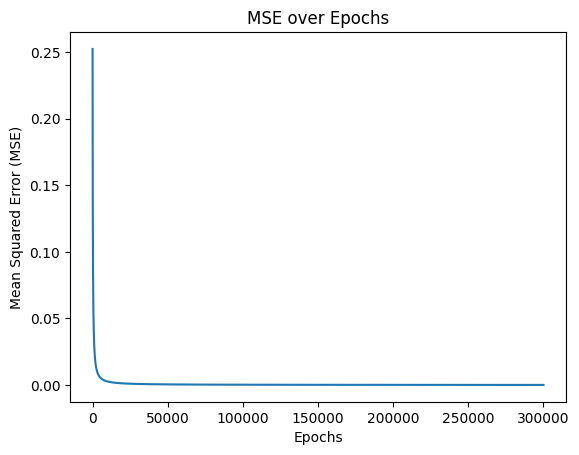

In [8]:
import matplotlib.pyplot as plt

plt.plot(mse_values)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Epochs')
plt.show()


# test

In [9]:
# Test cases
test_data = np.array([
    [0, 1],
    [1, 1]
])

for i, test_case in enumerate(test_data):

    w_sum = weighted_sum(test_case)
    prediction = sigmoid(w_sum)
    print(f"Test Case {i+1} (X1={test_case[0]}, X2={test_case[1]}): Prediction = {round(prediction)} ({prediction:.4f})")


Test Case 1 (X1=0, X2=1): Prediction = 0 (0.0093)
Test Case 2 (X1=1, X2=1): Prediction = 1 (0.9890)
